# **Import Library yang dibutuhkan**

In [1]:
# Mengimport Library yang dibutuhkan
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Dataset**

In [2]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_BlueArchive_1.csv")
df.head()

,userName,score,at,content
0,Ipan Zarif,5,2024-06-01 17:02:49,Yah game nya udah bagus tapi kok gak ada terje...
1,Alex Ramadhan,5,2024-06-01 17:00:16,Untuk NEXON game Blue archive sudah bagus tapi...
2,Farel Maulana,1,2024-06-01 15:52:08,ko gak bisa di ewe :(
3,Raditya Ghilbran,5,2024-06-01 14:55:58,"Game nya bagus tapi maaf, saat story nya tamat..."
4,Amandaadi224 Adi,5,2024-06-01 13:11:55,Game bagus banget bang Nexon games😋😋


In [3]:
# Menampilkan Column Content, Username, dan at.
df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,Yah game nya udah bagus tapi kok gak ada terje...,Ipan Zarif,2024-06-01 17:02:49
1,Untuk NEXON game Blue archive sudah bagus tapi...,Alex Ramadhan,2024-06-01 17:00:16
2,ko gak bisa di ewe :(,Farel Maulana,2024-06-01 15:52:08
3,"Game nya bagus tapi maaf, saat story nya tamat...",Raditya Ghilbran,2024-06-01 14:55:58
4,Game bagus banget bang Nexon games😋😋,Amandaadi224 Adi,2024-06-01 13:11:55
...,...,...,...
791,Game ini sangat baik dermawan dan dapat anime,Kenzie Belva Fidelya,2024-05-01 00:28:05
792,👍,Saint,2024-05-01 00:19:30
793,"Mulai dari BGM, story, character, dan event ny...",Farhan_ 17,2024-04-30 23:44:49
794,Gamenya bagus dan story nya bagus dan anak ke-,Bangkutempe,2024-04-30 22:59:14


In [4]:
# Memberikan Informasi terkait Dataset yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   796 non-null    object
 1   userName  796 non-null    object
 2   at        796 non-null    object
dtypes: object(3)
memory usage: 18.8+ KB


In [5]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.
df.describe()

,content,userName,at
count,796,796,796
unique,770,794,796
top,Bagus,Bangkutempe,2024-06-01 17:02:49
freq,8,2,1


# **Cleaning Data**

In [6]:
# Mengetahui jumlah berapa baris dan kolom.
df.shape

(796, 3)

In [7]:
# Menghapus data yang duplicate
df = df.drop_duplicates(subset=['content'])

In [8]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

In [9]:
# Menghapus data yang kosong
df = df.dropna()

In [10]:
# Memastikan tidak ada missing value yang tersisa.
df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [11]:
df.shape

(770, 3)

In [12]:
def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [13]:
def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [14]:
# Mengaplikasikan fungsi yang sudah dibuat kedalam column 'content'
df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,yah game nya udah bagus tapi kok gak ada terje...,Ipan Zarif,2024-06-01 17:02:49
1,untuk nexon game blue archive sudah bagus tapi...,Alex Ramadhan,2024-06-01 17:00:16
2,ko gak bisa di ewe,Farel Maulana,2024-06-01 15:52:08
3,game nya bagus tapi maaf saat story nya tamat ...,Raditya Ghilbran,2024-06-01 14:55:58
4,game bagus banget bang nexon games,Amandaadi224 Adi,2024-06-01 13:11:55
...,...,...,...
790,game ini punya char dan cerita yg bagus,Azzka,2024-05-01 00:54:17
791,game ini sangat baik dermawan dan dapat anime,Kenzie Belva Fidelya,2024-05-01 00:28:05
793,mulai dari bgm story character dan event ny se...,Farhan_ 17,2024-04-30 23:44:49
794,gamenya bagus dan story nya bagus dan anak ke,Bangkutempe,2024-04-30 22:59:14


# **Preprocessing**


1.   Normalisasi
2.   Stopword
3.   Tokenize
4.   Steamming



In [15]:
# 1. Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : ""
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,yah game nya udah bagus tapi kenapa tidak ada ...,Ipan Zarif,2024-06-01 17:02:49
1,untuk nexon game blue archive sudah bagus tapi...,Alex Ramadhan,2024-06-01 17:00:16
2,ko tidak bisa di ewe,Farel Maulana,2024-06-01 15:52:08
3,game nya bagus tapi maaf saat story nya tamat ...,Raditya Ghilbran,2024-06-01 14:55:58
4,game bagus banget bang nexon games,Amandaadi224 Adi,2024-06-01 13:11:55
...,...,...,...
790,game ini punya char dan cerita yang bagus,Azzka,2024-05-01 00:54:17
791,game ini sangat baik dermawan dan dapat anime,Kenzie Belva Fidelya,2024-05-01 00:28:05
793,mulai dari bgm story character dan event ny se...,Farhan_ 17,2024-04-30 23:44:49
794,gamenya bagus dan story nya bagus dan anak ke,Bangkutempe,2024-04-30 22:59:14


In [16]:
# Menginstall Library Sastrawi
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.7 MB/s eta 0:00:00


In [17]:
# 2. Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,yah game nya udah bagus kenapa ada terjemahan ...,Ipan Zarif,2024-06-01 17:02:49
1,nexon game blue archive bagus ada atidak kuran...,Alex Ramadhan,2024-06-01 17:00:16
2,ko bisa ewe,Farel Maulana,2024-06-01 15:52:08
3,game nya bagus maaf story nya tamat langsung k...,Raditya Ghilbran,2024-06-01 14:55:58
4,game bagus banget bang nexon games,Amandaadi224 Adi,2024-06-01 13:11:55
...,...,...,...
790,game punya char cerita bagus,Azzka,2024-05-01 00:54:17
791,game sangat baik dermawan dapat anime,Kenzie Belva Fidelya,2024-05-01 00:28:05
793,mulai bgm story character event ny semua sanga...,Farhan_ 17,2024-04-30 23:44:49
794,gamenya bagus story nya bagus anak,Bangkutempe,2024-04-30 22:59:14


In [18]:
# 3. Tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized

0      [yah, game, nya, udah, bagus, kenapa, ada, ter...
1      [nexon, game, blue, archive, bagus, ada, atida...
2                                        [ko, bisa, ewe]
3      [game, nya, bagus, maaf, story, nya, tamat, la...
4              [game, bagus, banget, bang, nexon, games]
                             ...                        
790                   [game, punya, char, cerita, bagus]
791         [game, sangat, baik, dermawan, dapat, anime]
793    [mulai, bgm, story, character, event, ny, semu...
794            [gamenya, bagus, story, nya, bagus, anak]
795                              [rate, gachanya, ampas]
Name: content, Length: 770, dtype: object

In [19]:
# # 4. Steamming

# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# def stemming(text_cleaning):
#     factory = StemmerFactory()
#     stemmer = factory.create_stemmer()
#     stemmed_words = [stemmer.stem(w) for w in text_cleaning]
#     return " ".join(stemmed_words)

# tokenized = tokenized.apply(stemming)

# tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_BlueArchive_1.csv', index = False)


In [20]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_BlueArchive_1.csv', encoding = 'latin1')
df_clean

,content
0,yah game nya udah bagus kenapa ada terjemah ba...
1,nexon game blue archive bagus ada atidak kuran...
2,ko bisa ewe
3,game nya bagus maaf story nya tamat langsung k...
4,game bagus banget bang nexon games
...,...
765,game punya char cerita bagus
766,game sangat baik dermawan dapat anime
767,mulai bgm story character event ny semua sanga...
768,gamenya bagus story nya bagus anak


# **Translate**

In [21]:
# # Menginstall Library easynmt
# !pip install -U easynmt

In [22]:
# import pandas as pd
# from easynmt import EasyNMT

In [23]:
# df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_BlueArchive_1.csv', encoding='latin1')

In [24]:
# source_lang = 'id'  # Replace with the source language of your data
# target_lang = 'en'  # Replace with the target language

In [25]:
# model = EasyNMT('opus-mt')  # You can choose a different model name here

In [26]:
# df2 = df_clean.fillna(method = 'pad')
# df2

In [27]:
# df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
# df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_BlueArchive_1.csv')

In [29]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_BlueArchive_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,yah game nya udah bagus kenapa ada terjemah ba...,"fontcolor="" # FFFF00""yesthegameisgood fontcolo..."
1,1,nexon game blue archive bagus ada atidak kuran...,The nexon game blue archive is good. There's n...
2,2,ko bisa ewe,ko can ewe
3,3,game nya bagus maaf story nya tamat langsung k...,It's a good game. I'm sorry the story ended. I...
4,4,game bagus banget bang nexon games,It's a great game. Bang nexon games.
...,...,...,...
765,765,game punya char cerita bagus,The game's got a good story char
766,766,game sangat baik dermawan dapat anime,The game is very good. The benefactor can be a...
767,767,mulai bgm story character event ny semua sanga...,How about the story character at Mrs.'s event?...
768,768,gamenya bagus story nya bagus anak,"It's a good game. It's a good story, kid."


# **Labeling**

In [30]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_BlueArchive_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,yah game nya udah bagus kenapa ada terjemah ba...,"fontcolor="" # FFFF00""yesthegameisgood fontcolo..."
1,1,nexon game blue archive bagus ada atidak kuran...,The nexon game blue archive is good. There's n...
2,2,ko bisa ewe,ko can ewe
3,3,game nya bagus maaf story nya tamat langsung k...,It's a good game. I'm sorry the story ended. I...
4,4,game bagus banget bang nexon games,It's a great game. Bang nexon games.
...,...,...,...
765,765,game punya char cerita bagus,The game's got a good story char
766,766,game sangat baik dermawan dapat anime,The game is very good. The benefactor can be a...
767,767,mulai bgm story character event ny semua sanga...,How about the story character at Mrs.'s event?...
768,768,gamenya bagus story nya bagus anak,"It's a good game. It's a good story, kid."


In [31]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [32]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [33]:
data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 388
Netral = 239
Negatif = 143

Total Data Seluruhnya : 770


In [34]:
df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,yah game nya udah bagus kenapa ada terjemah ba...,"fontcolor="" # FFFF00""yesthegameisgood fontcolo...",Netral
1,1,nexon game blue archive bagus ada atidak kuran...,The nexon game blue archive is good. There's n...,Positif
2,2,ko bisa ewe,ko can ewe,Netral
3,3,game nya bagus maaf story nya tamat langsung k...,It's a good game. I'm sorry the story ended. I...,Positif
4,4,game bagus banget bang nexon games,It's a great game. Bang nexon games.,Positif
...,...,...,...,...
765,765,game punya char cerita bagus,The game's got a good story char,Positif
766,766,game sangat baik dermawan dapat anime,The game is very good. The benefactor can be a...,Positif
767,767,mulai bgm story character event ny semua sanga...,How about the story character at Mrs.'s event?...,Positif
768,768,gamenya bagus story nya bagus anak,"It's a good game. It's a good story, kid.",Positif


In [35]:
# Menghapus Colum Unnamed: 0
data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,yah game nya udah bagus kenapa ada terjemah ba...,"fontcolor="" # FFFF00""yesthegameisgood fontcolo...",Netral
1,nexon game blue archive bagus ada atidak kuran...,The nexon game blue archive is good. There's n...,Positif
2,ko bisa ewe,ko can ewe,Netral
3,game nya bagus maaf story nya tamat langsung k...,It's a good game. I'm sorry the story ended. I...,Positif
4,game bagus banget bang nexon games,It's a great game. Bang nexon games.,Positif
...,...,...,...
765,game punya char cerita bagus,The game's got a good story char,Positif
766,game sangat baik dermawan dapat anime,The game is very good. The benefactor can be a...,Positif
767,mulai bgm story character event ny semua sanga...,How about the story character at Mrs.'s event?...,Positif
768,gamenya bagus story nya bagus anak,"It's a good game. It's a good story, kid.",Positif


# **Visualisasi**


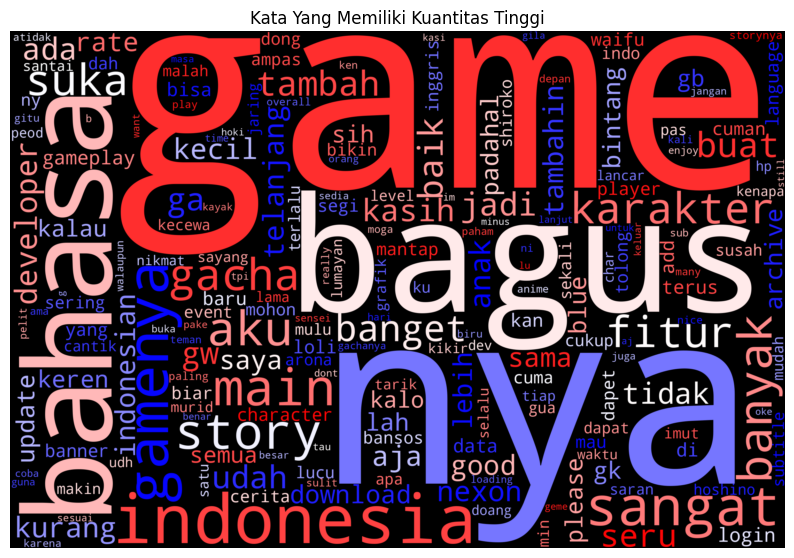

In [36]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


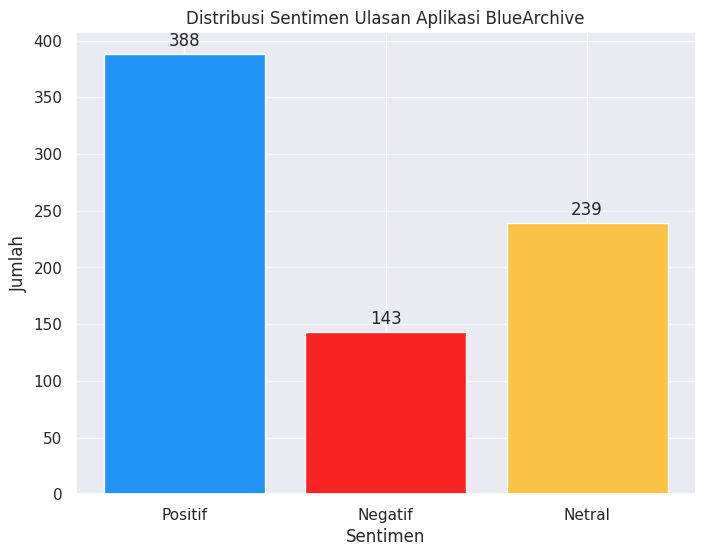

In [37]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi BlueArchive")


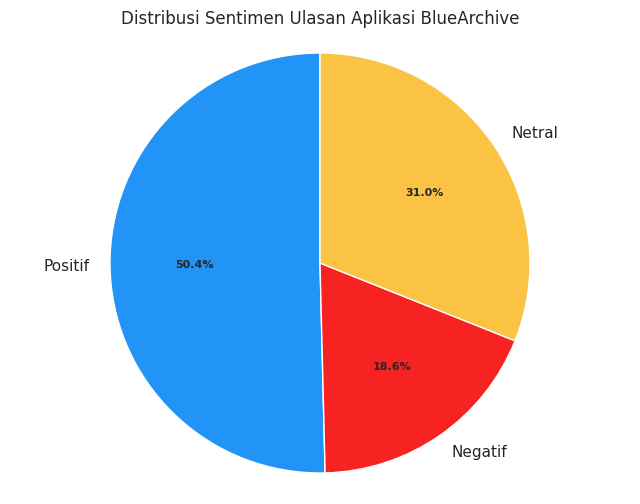

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi BlueArchive")

In [39]:
# Menghapus Sentimen Netral
data = data[data['sentimen'] != 'Netral']
data

,content,content_en,sentimen
1,nexon game blue archive bagus ada atidak kuran...,The nexon game blue archive is good. There's n...,Positif
3,game nya bagus maaf story nya tamat langsung k...,It's a good game. I'm sorry the story ended. I...,Positif
4,game bagus banget bang nexon games,It's a great game. Bang nexon games.,Positif
5,why are most of the children young what i want...,why are most of the children young what i want...,Positif
6,banyak karakter lucu,many funny characters,Positif
...,...,...,...
764,sungguh sayang ada fitur telanjang,It's too bad there's a nudity feature.,Negatif
765,game punya char cerita bagus,The game's got a good story char,Positif
766,game sangat baik dermawan dapat anime,The game is very good. The benefactor can be a...,Positif
767,mulai bgm story character event ny semua sanga...,How about the story character at Mrs.'s event?...,Positif


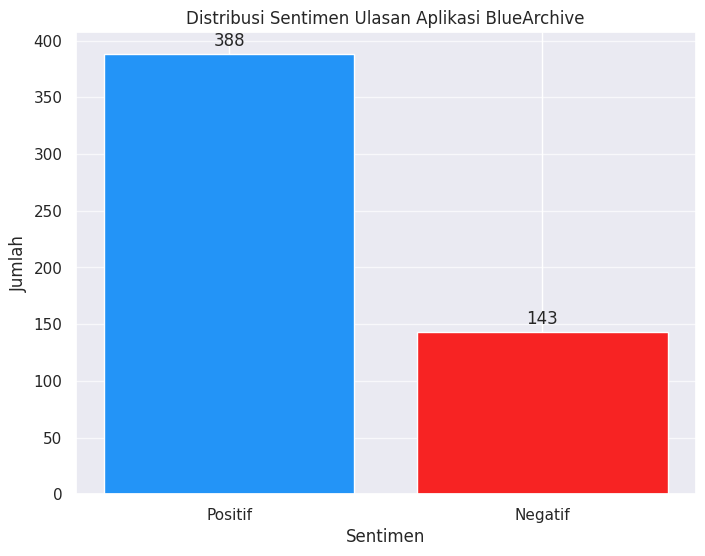

In [40]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi BlueArchive")


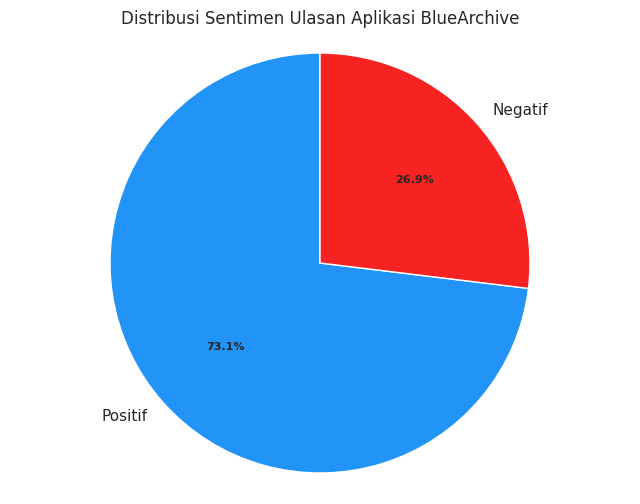

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi BlueArchive")

In [42]:
data = data.replace({'Positif':1, 'Negatif':0})
data

,content,content_en,sentimen
1,nexon game blue archive bagus ada atidak kuran...,The nexon game blue archive is good. There's n...,1
3,game nya bagus maaf story nya tamat langsung k...,It's a good game. I'm sorry the story ended. I...,1
4,game bagus banget bang nexon games,It's a great game. Bang nexon games.,1
5,why are most of the children young what i want...,why are most of the children young what i want...,1
6,banyak karakter lucu,many funny characters,1
...,...,...,...
764,sungguh sayang ada fitur telanjang,It's too bad there's a nudity feature.,0
765,game punya char cerita bagus,The game's got a good story char,1
766,game sangat baik dermawan dapat anime,The game is very good. The benefactor can be a...,1
767,mulai bgm story character event ny semua sanga...,How about the story character at Mrs.'s event?...,1


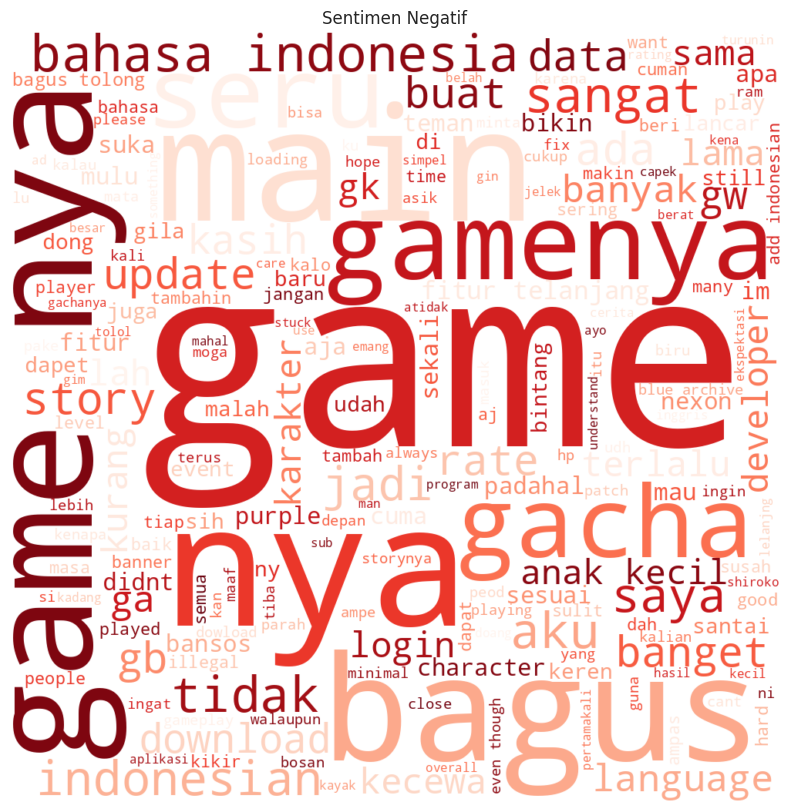

In [43]:
# Visualisasi Wordcould Positif & Negatif

data_negatif = data[data['sentimen'] == 0]
data_positif = data[data['sentimen'] == 1]

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

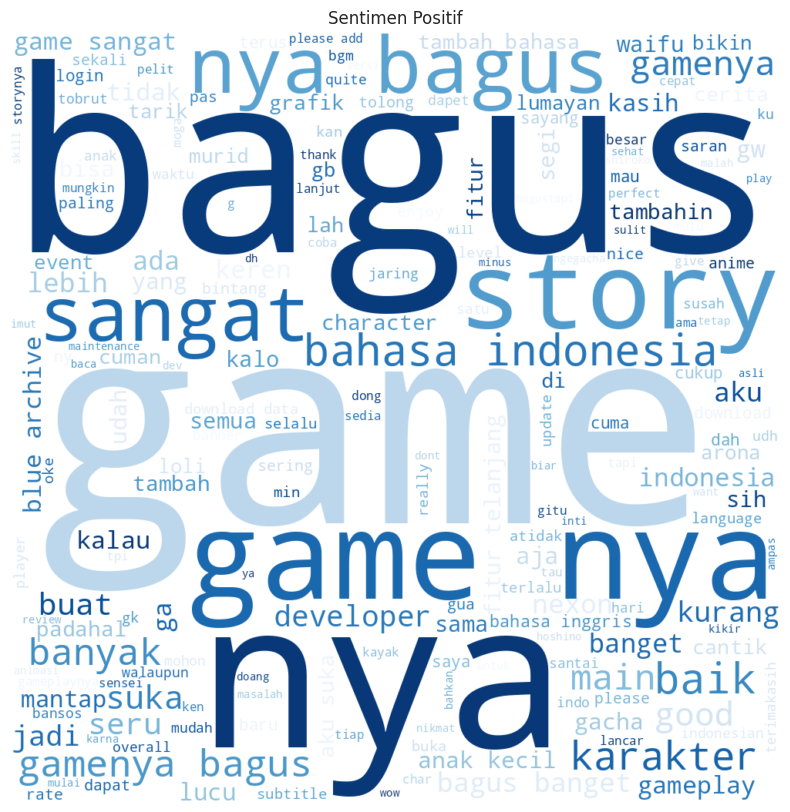

In [44]:
all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

In [45]:
# Menghitung Jumlah Sentimen Negatif dan Positif
data['sentimen'].value_counts()

sentimen
1    388
0    143
Name: count, dtype: int64

# **Data Preparation & Modeling**

In [46]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.metrics import confusion_matrix

In [47]:
# Memisahkan data menjadi data latih dan data uji
X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [48]:
X_train

585                 game bagus kalo ada bahasa indonesia
765                         game punya char cerita bagus
252                 game nya jelek ga ad fitur telanjang
538    this patch was really the worst for me spin i ...
104    game ny bagus mantap walu banyak loli nya saya...
                             ...                        
107                                 desain karakter lucu
160                       gem nya bagus berat banget cok
381                               bagus banyak neesannya
626    belakang jaring buruk mulu tiap mau login pada...
151                     kadang ngestack screen moga baik
Name: content, Length: 424, dtype: object

In [49]:
# Menggunakan TfidfVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)


TfidfVectorizer()

In [50]:
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [51]:
X_train_vec.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [52]:
for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1]:
  svm = LinearSVC(C=c)
  svm.fit(X_train_vec, y_train)
  print('Akurasi untuk c = %s: %s' %(c, accuracy_score(y_test, svm.predict(X_test_vec))))

Akurasi untuk c = 0.01: 0.719626168224299
Akurasi untuk c = 0.05: 0.719626168224299
Akurasi untuk c = 0.25: 0.7383177570093458
Akurasi untuk c = 0.5: 0.8037383177570093
Akurasi untuk c = 0.75: 0.8037383177570093
Akurasi untuk c = 1: 0.794392523364486


In [53]:
linear_svc = LinearSVC(C = 1.0)
calibrated_svc = CalibratedClassifierCV(linear_svc)
calibrated_svc.fit(X_train_vec, y_train)

CalibratedClassifierCV(estimator=LinearSVC())

In [54]:
print('Accuracy score model final: %s ' %accuracy_score(y_test, svm.predict(X_test_vec)))

Accuracy score model final: 0.794392523364486 


In [55]:
y_pred = svm.predict(X_test_vec)
print('Accuracy Of SVM Classfier On Test Set: {:.2f}' .format(svm.score(X_test_vec, y_test)))

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))


Accuracy Of SVM Classfier On Test Set: 0.79
[[14 16]
 [ 6 71]]
              precision    recall  f1-score   support

           0       0.70      0.47      0.56        30
           1       0.82      0.92      0.87        77

    accuracy                           0.79       107
   macro avg       0.76      0.69      0.71       107
weighted avg       0.78      0.79      0.78       107



In [56]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives (TP) = ', cm[0, 0])  # Assuming positive class is at index 0

print('\nTrue Negatives (TN) = ', cm[1, 1])  # Assuming negative class is at index 1

print('\nFalse Positives (FP) = ', cm[0, 1])

print('\nFalse Negatives (FN) = ', cm[1, 0])

print('\nAccuracy = ', accuracy)

Confusion matrix

 [[14 16]
 [ 6 71]]

True Positives (TP) =  14

True Negatives (TN) =  71

False Positives (FP) =  16

False Negatives (FN) =  6

Accuracy =  0.794392523364486


[Text(0.5, 1.0, 'Heatmap TP, TN, FP, FN')]

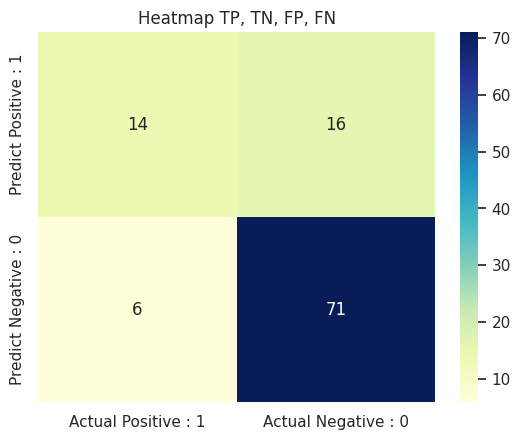

In [57]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive : 1', 'Actual Negative : 0'],
                                 index=['Predict Positive : 1', 'Predict Negative : 0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu').set(title='Heatmap TP, TN, FP, FN')

In [58]:
# Classification Accuracy

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [59]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7944


In [60]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2056


# **Testing**


In [61]:
# Contoh teks baru
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = calibrated_svc.predict(new_text_vec)
predicted_proba = calibrated_svc.predict_proba(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
    probability = predicted_proba[0][1] * 100
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][0] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")


Masukkan Teks Baru : lumayan bagus storynya
Hasil Analisis Sentimen Untuk Teks Baru: Positif
Probabilitas: 90.37%
Probabilitas: 90.36882215475896 %


In [65]:
# Contoh teks baru
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = calibrated_svc.predict(new_text_vec)
predicted_proba = calibrated_svc.predict_proba(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
    probability = predicted_proba[0][1] * 100
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][0] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")


Masukkan Teks Baru : jelek
Hasil Analisis Sentimen Untuk Teks Baru: Negatif
Probabilitas: 53.03%
Probabilitas: 53.03121441020704 %
